In [86]:
%pylab inline
import pynbody
import sphviewer as sph
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from sphviewer.tools import QuickView

Populating the interactive namespace from numpy and matplotlib


In [87]:
path='/mnt/is2/dpaz/ITV/S1373/out/'
s=pynbody.load(path+'snapshot_050')

In [88]:
s.families()

[<Family gas>, <Family dm>, <Family star>]

In [89]:
dm = s.dm

In [90]:
dm.loadable_keys()

['idgn', 'pos', 'mass', 'iord', 'idch', 'vel']

In [91]:
pos = dm['pos']
vel = dm['vel']
m   = dm['mass']
hsml= np.ones(len(pos))

In [92]:
xbox=403.8960 
ybox=459.8882
zbox=440.9021 

xc=408.205481 - xbox + 250 
yc=457.777839 - ybox + 250   
zc=441.538681 - zbox + 250

In [93]:
x = pos[:,0] - xc
y = pos[:,1] - yc 
z = pos[:,2] - zc 

In [94]:
rl=25
corte, = np.where((x <rl) & (y <rl) & (z <rl) & (x >-rl) & (y >-rl) & (z >-rl))
#corte, = np.where((x <rl) & (y <rl) & (z <25) & (x >-9) & (y >-rl) & (z >-9))

In [95]:
p=np.array
p=np.zeros([len(corte),3])
p[:,0]=x[corte]
p[:,1]=y[corte]
p[:,2]=z[corte]
ms   = m[corte]
smth = hsml[corte]
vl   = vel[corte,:]

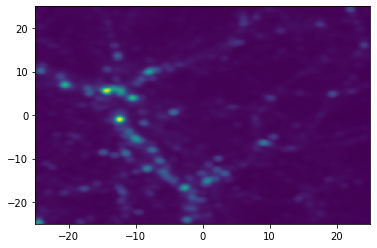

In [99]:
qv = QuickView(p, hsml=smth, r='infinity',  logscale=False)
density_field = qv.get_image()
extent = qv.get_extent()

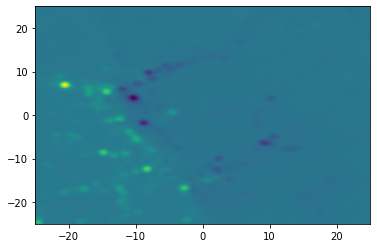

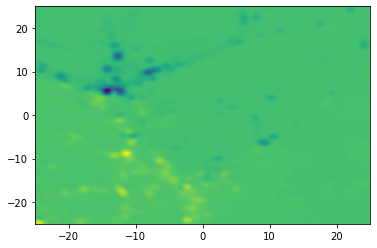

In [100]:
vfield = []
for i in range(2):
    qv = QuickView(p, vl[:,i], hsml=smth, r='infinity',plot=True,logscale=False)
    vfield.append(qv.get_image()/density_field)

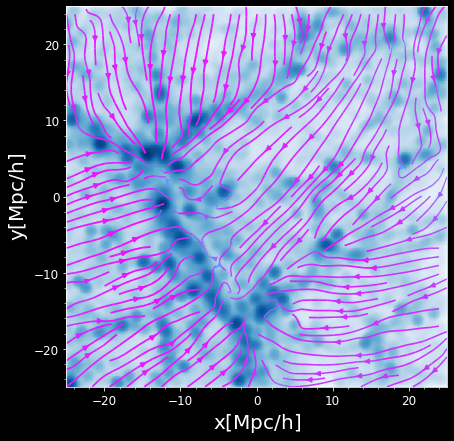

In [115]:
import matplotlib.pyplot as plt

plt.style.use('dark_background')
axis_font = {'fontname':'Arial', 'size':'20'}
matplotlib.rc('xtick', labelsize=12)     
matplotlib.rc('ytick', labelsize=12)


fig = plt.figure(1, figsize=(7,7))
ax = fig.add_subplot(111)
X = np.linspace(extent[0], extent[1], 500)
Y = np.linspace(extent[2], extent[3], 500)
ax.imshow(np.log10(density_field), origin='lower', extent=extent, cmap='Blues')
v = np.log10(np.sqrt(vfield[0]**2+vfield[1]**2))
color = v/np.max(v)
lw = 2*color
streams = ax.streamplot(X,Y,vfield[0], vfield[1], color=color,
                        density=1.5, cmap='cool', linewidth=lw, arrowsize=1)
ax.set_xlim(extent[0],extent[1])
ax.set_ylim(extent[2],extent[3])
ax.minorticks_on()
ax.set_xlabel(r'$\rm x  [Mpc/h]$', size=20)
ax.set_ylabel(r'$\rm y  [Mpc/h]$', size=20)
plt.show()

#plt.savefig(fname='/home/arodriguez/tesis/sph-viewer/streamlines.png',format='png')

In [38]:
path='/mnt/is2/dpaz/ITV/R1198/out/'
s=pynbody.load(path+'snapshot_050')

In [45]:
dm = s.dm

In [46]:
pos = dm['pos']
vel = dm['vel']
m   = dm['mass']
hsml= np.ones(len(pos))

In [47]:
xbox=411.2170 
ybox=162.1655
zbox=453.0553

xc=413.621475  - xbox + 250 
yc=162.604601- ybox + 250   
zc=448.953638 - zbox + 250

In [48]:
x = pos[:,0] - xc
y = pos[:,1] - yc 
z = pos[:,2] - zc 

In [54]:
rl=35
#corte, = np.where((x <rl) & (y <rl) & (z <rl) & (x >-rl) & (y >-rl) & (z >-rl))
corte, = np.where((x <rl) & (y <rl) & (z <9) & (x >-rl) & (y >-rl) & (z >-9))

In [55]:
p=np.array
p=np.zeros([len(corte),3])
p[:,0]=x[corte]
p[:,1]=y[corte]
p[:,2]=z[corte]
ms   = m[corte]
smth = hsml[corte]
vl   = vel[corte,:]

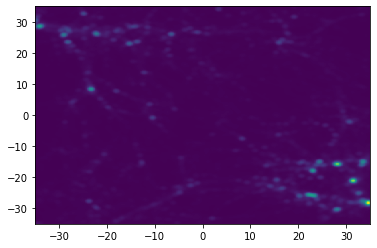

In [56]:
qv = QuickView(p, hsml=smth, r='infinity',  logscale=False)
density_field = qv.get_image()
extent = qv.get_extent()

In [57]:
vfield = []
for i in range(2):
    qv = QuickView(p, vl[:,i], hsml=smth, r='infinity',plot=False,logscale=False)
    vfield.append(qv.get_image()/density_field)

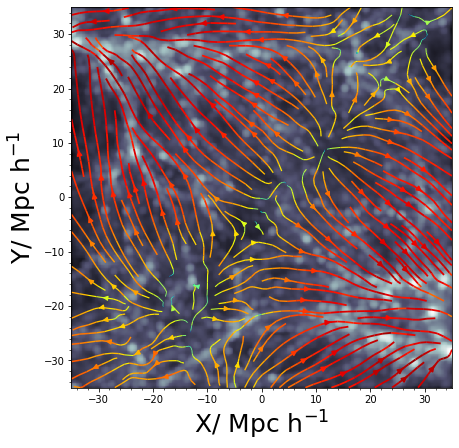

In [58]:
fig = plt.figure(1, figsize=(7,7))
ax = fig.add_subplot(111)
X = np.linspace(extent[0], extent[1], 500)
Y = np.linspace(extent[2], extent[3], 500)
ax.imshow(np.log10(density_field), origin='lower', extent=extent, cmap='bone')
v = np.log10(np.sqrt(vfield[0]**2+vfield[1]**2))
color = v/np.max(v)
lw = 2*color
streams = ax.streamplot(X,Y,vfield[0], vfield[1], color=color,
                        density=1.5, cmap='jet', linewidth=lw, arrowsize=1)
ax.set_xlim(extent[0],extent[1])
ax.set_ylim(extent[2],extent[3])
ax.minorticks_on()
ax.set_xlabel(r'$\rm X / \ Mpc \ h^{-1}$', size=25)
ax.set_ylabel(r'$\rm Y / \ Mpc \ h^{-1}$', size=25)
plt.show()